# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
#建立模型

In [8]:
model=Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2663 - accuracy: 0.9246 - val_loss: 0.1333 - val_accuracy: 0.9610
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1080 - accuracy: 0.9683 - val_loss: 0.0965 - val_accuracy: 0.9717
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0704 - accuracy: 0.9786 - val_loss: 0.0918 - val_accuracy: 0.9732
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.0812 - val_accuracy: 0.9758
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0890 - val_accuracy: 0.9760
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0848 - val_accuracy: 0.9762
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0804 - val_accuracy

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

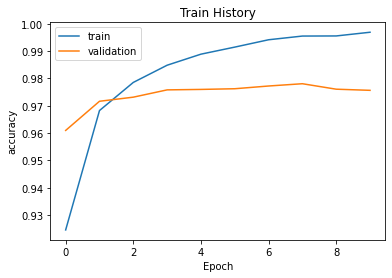

In [12]:
show_train_history(train_history,'accuracy','val_accuracy')

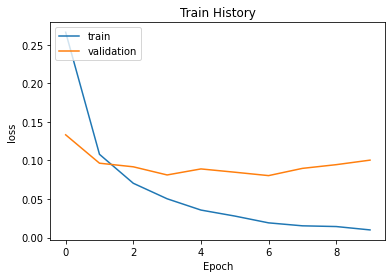

In [13]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9789

accuracy= 0.9789000153541565


In [15]:
##新增一層

In [16]:
model=Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2819 - accuracy: 0.9179 - val_loss: 0.1315 - val_accuracy: 0.9599
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1058 - accuracy: 0.9684 - val_loss: 0.1074 - val_accuracy: 0.9682
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.0971 - val_accuracy: 0.9699
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0991 - val_accuracy: 0.9710
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0822 - val_accuracy: 0.9770
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.1027 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0929 - val_ac

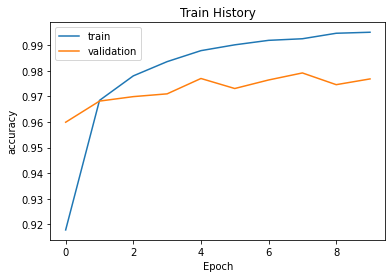

In [19]:
show_train_history(train_history,'accuracy','val_accuracy')

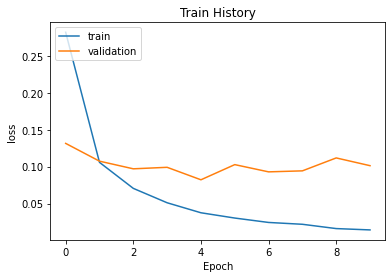

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9798

accuracy= 0.9797999858856201


多加層數後，準確率並沒有特別提升，或是變成overfitting。